In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [6]:
f = pd.read_csv('../data/temp.csv', delimiter=';', header=None)

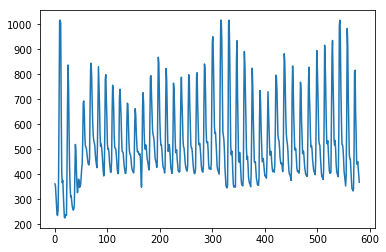

In [8]:
plt.plot(f[1])
# f

In [4]:
pres = pd.read_csv('../../temp_HR_pres.csv', delimiter=';', header=None)

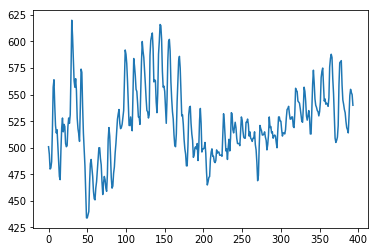

In [5]:
plt.plot(pres[1])